In [3]:
##Project 4 - UDACITY_NANODEGREE_FUNDAMENTALS_OF DATA_SCIENCE
#Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

#Load libraries
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')



In [4]:
#Importing Dataset
df = pd.read_csv('train.csv')

In [5]:
#Checking rows and columns
df.shape

(891, 12)

In [6]:
#Lets visualize  the first 5 entries of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Let's clean the data since we have lots of missing information
df.isnull().tail()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Dropping rows where Age column is missing
df.dropna(subset=['Age'], inplace=True) 
df.shape

(714, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Lets discover some information about the dataset
#Passengers who embarked at Southhampton, Queenstown and Cherbourg
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [11]:
#Dropping those who didn't embarked
df['Embarked'].value_counts().sum()
df.dropna(subset=['Embarked'], inplace=True) 
df.shape

(712, 12)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Convert Column "Age" into integer
df['Age'] = df['Age'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [14]:
#Finding numbers of adults
adults  = df[(df.Age > 18)].count().astype(int)
adults = adults['Age']
adults = 'There were {}  adults'.format(adults)
print(adults)

There were 573  adults


In [15]:
#Finding numbers of children
children  = df[(df.Age <= 18)].count().astype(int)
children = children['Age']
children = 'There were {}  children'.format(children)
print(adults)

There were 573  adults


In [ ]:
#Finding numbers of men and women
counts = df['Sex'].value_counts()
print(counts)
print('n\There were 453 Men and 259 women aboard, including children')

In [ ]:
#how many lives were saved?
survivors = df[(df.Survived == 1)].count()
survivors = survivors['Survived']
survivors = 'There were {} survivors'.format(survivors)
print(survivors)

 

In [ ]:
#How many lives were lost?
df_lost = df.loc[df['Survived'] == 0].count().astype(int)
df_lost = df_lost['Survived']
df_lost = 'There were {} lives lost'.format(df_lost) 
print (df_lost)

In [ ]:
#How many male adults survived
df_saved  = df[(df.Sex == 'male') & (df.Age > 18) &(df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} male adults survived'.format(df_saved)
print(df_saved)

In [ ]:
#How many female adults survived
df_saved  = df[(df.Sex == 'female') & (df.Age > 18) &(df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} female adults survived'.format(df_saved)
print(df_saved)

In [ ]:
# Percentage of kids 
139 / 712 * 100

In [ ]:
#Percentage of men
453 / 712 *100

In [164]:
#Percentage of men that survived
 
69 / 453 * 100

15.2317880794702

In [165]:
#Percentage of men
259 / 712 * 100

36.37640449438202

In [166]:
#Percentage of women that survived
149 / 259 *100

57.52895752895753

In [167]:
#How many were boys  
boys = df[(df.Sex == 'male') & (df.Age <= 18)].count().astype(int)
boys = boys['Sex']
boys = 'There were {} boys'.format(boys)
print(boys)

There were 71 boys


In [168]:
#How many were girls  
girls = df[(df.Sex == 'female') & (df.Age <= 18)].count().astype(int)
girls = girls['Sex']
girls = 'There were {} girls'.format(girls)
print(girls)

There were 68 girls


In [169]:
#How many boys were saved
df_saved = df[(df.Sex == 'male') & (df.Age <= 18) & (df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} boys saved'.format(df_saved)
print(df_saved)

There were 24 boys saved


In [170]:
#How many girls were saved
df_saved = female_count = df[(df.Sex == 'female') & (df.Age <= 18) & (df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} girls saved'.format(df_saved)
print(df_saved)
 

There were 46 girls saved


In [171]:
#
# Let's find the survivors by classes
#

In [172]:
#List females survivors from First class
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1)&  (df.Age > 18)]
first_class = ffc_sur
first_class = ffc_sur[first_class.columns[1:5]]
first_class.head(5)
qty = (len(first_class))
qty = 'There are {} female survivors from the First Class'.format(qty)
print(qty)     
ffc_sur.head()

There are 70 female survivors from the First Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S


In [173]:
#List females survivors from Second class
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) &  (df.Age > 18)]
second_class = ffc_sur
second_class = ffc_sur[second_class.columns[1:5]]
second_class.head(5)
qty = (len(second_class))
qty = 'There are {} female survivors from the Second Class'.format(qty)
print(qty)     
ffc_sur.head()

There are 54 female survivors from the Second Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,2926,26.0,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21,0,0,C.A. 31026,10.5,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29,0,0,C.A. 29395,10.5,F33,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34,0,1,231919,23.0,NaN,S


In [174]:
#Printing  females survivors from Third class
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) &  (df.Age > 18)]
third_class = ffc_sur[first_class.columns[1:4]]
third_class.head(5) 
qty = (len(third_class))
qty = 'There are {} female survivors from the Third Class'.format(qty)
print(qty)     
ffc_sur.head()   
  

There are 25 female survivors from the Third Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,NaN,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19,0,0,330958,7.8792,NaN,Q
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30,0,0,364516,12.4750,NaN,S


In [175]:
#Printing  males survivors from First class
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1)]
first_class = ffc_sur[first_class.columns[1:4]]
first_class.head(5) 
qty = (len(first_class))
qty = 'There are {} male survivors from the first Class'.format(qty)
print(qty)     
ffc_sur.head()   

There are 40 male survivors from the first Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23,0,1,PC 17759,63.3583,D10 D12,C
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,0,0,111428,26.5500,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40,0,0,112277,31.0000,A31,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90.0000,C93,S


In [176]:
#Printing  males survivors from Second class
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2)]
second_class = ffc_sur[second_class.columns[1:4]]
first_class.head(5) 
qty = (len(second_class))
qty = 'There are {} male survivors from the Second Class'.format(qty)
print(qty)     
ffc_sur.head()  

There are 15 male survivors from the Second Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0,D56,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1,2,1,230136,39.0,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3,1,1,230080,26.0,F2,S
226,227,1,2,"Mellors, Mr. William John",male,19,0,0,SW/PP 751,10.5,NaN,S


In [177]:
#Printing  males survivors from Third class
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3)]
third_class = ffc_sur[third_class.columns[1:4]]
third_class.head(5) 
qty = (len(third_class))
qty = 'There are {} male survivors from the Third Class'.format(qty)
print(qty)     
ffc_sur.head()  

There are 38 male survivors from the Third Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32,0,0,1601,56.4958,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29,0,0,345779,9.5000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12,1,0,2651,11.2417,NaN,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24,0,0,C 17369,7.1417,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27,0,0,350043,7.7958,NaN,S


In [178]:
#Printing  female survivors under the age of 18 from First Class 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18)]
qty = (len(ffc_sur))
qty = 'There are {} female survivors under the age of 18 from the First Class'.format(qty)
print(qty)     
ffc_sur
ffc_sur = (len(first_class))

There are 10 female survivors under the age of 18 from the First Class


In [179]:
#Printing  female survivors under the age of 18 from Second Class 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18)]
qty = (len(ffc_sur))
qty = 'There are {} female survivors under the age of 18 from the Second Class'.format(qty)
print(qty)     
ffc_sur
ffc_sur = (len(first_class))

There are 14 female survivors under the age of 18 from the Second Class


In [180]:
#Printing  female survivors under the age of 18 from Third Class 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18)]
third_class = ffc_sur
third_class.head(5) 
qty = (len(second_class))
qty = 'There are {} female  survivors from the Third Class'.format(qty)
print(qty)     

There are 15 female  survivors from the Third Class


In [181]:
#Printing  male survivors under the age of 18 from First Class 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18)]
first_class = ffc_sur
qty = (len(first_class))
qty = 'There are {} male survivors under the age of 18  from the First Class'.format(qty)
print(qty)  

There are 4 male survivors under the age of 18  from the First Class


In [182]:
#Printing  male survivors under the age of 18 from First Class 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18)]
second_class = ffc_sur
qty = (len(second_class))
qty = 'There are {} male survivors under the age of 18  from the Second Class'.format(qty)
print(qty) 

There are 9 male survivors under the age of 18  from the Second Class


In [183]:
#Printing  male survivors under the age of 18 from First Class 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18)]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} male survivors under the age of 18  from the Third Class'.format(qty)
print(qty)

There are 11 male survivors under the age of 18  from the Third Class


In [184]:
####
####
####


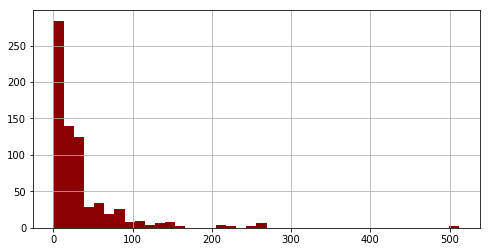

In [185]:
#Lets visualize the price Fares
df['Fare'].hist(color='darkred',bins=40,figsize=(8,4))

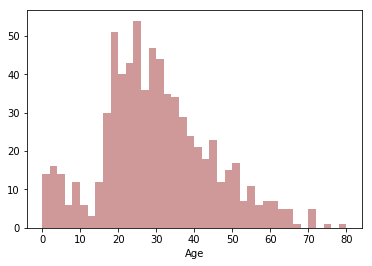

In [186]:
#Let's visualize the age of passengers 
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

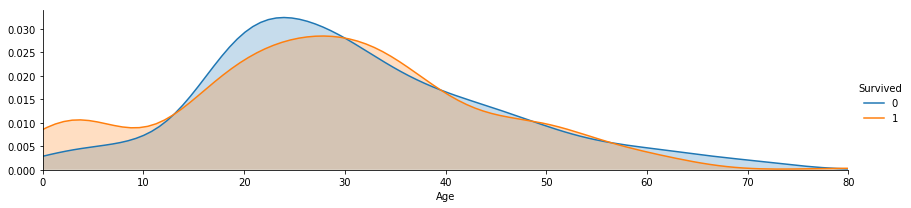

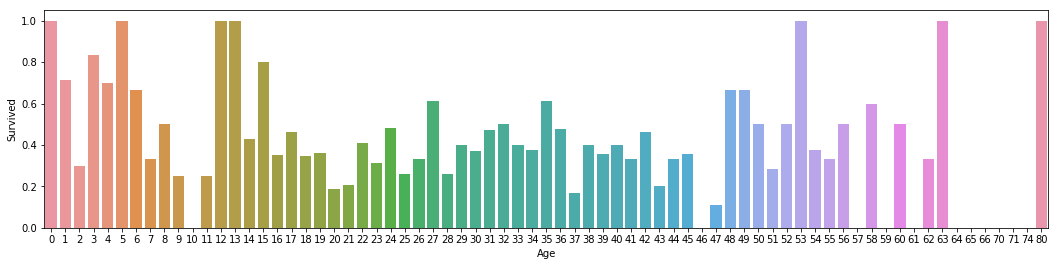

In [187]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4)) 
average_age = df[["Age","Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [188]:
#FINDING MAIN CHARACTERS

#Finding Thomas Andrews
#Born: February 7, 1873
#Birthplace: Comber, County Down, Ireland
#Death: April 15, 1912, Atlantic Ocean (perished in Titanic sinking)
thomas= df[df['Name'].str.contains('Andrews', na = False)]
thomas = df[(df.PassengerId == 807) ]
thomas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0,A36,S


In [189]:
#John Jacob Astor
#Born: July 13, 1864
#irthplace: Rhinebeck, New York
#Death: April 15, 1912, Atlantic Ocean (perished in Titanic disaster)
john= df[df['Name'].str.contains('Astor', na = False)]
john

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C62 C64,C


In [190]:
#There were only one black person in the ship
#The Laroche family 
#Joseph Phillippe Lemercier Laroche
# url - http://www.chasingthefrog.com/reelfaces/titanic.php
joseph = df[df['Name'].str.contains('Laroche', na = False)]
joseph

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3,1,2,SC/Paris 2123,41.5792,NaN,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22,1,2,SC/Paris 2123,41.5792,NaN,C
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25,1,2,SC/Paris 2123,41.5792,NaN,C


In [191]:
#Margaret "Molly" Brown
#Born: July 18, 1867
#Birthplace: Hannibal, Missouri
#Death: October 26, 1932, Barbizon Hotel, New York City (brain tumor) 
margaret = df[df['Name'].str.contains('Tobin')]
margaret 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44,0,0,PC 17610,27.7208,B4,C


In [192]:
#Find Adults Females that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 1 Adults Females that survived from the 1st Class that board in Queenstown 


In [16]:
#Find Adults Females that survived from the 1st Class that board in Cherborough 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 33 Adults Females that survived from the 1st Class that board in Cherborough 


In [21]:
#Find Adults Females that survived from the 1st Class that board in Southhampton 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 36 Adults Females that survived from the 1st Class that board in Southampton 


In [22]:
###########

In [23]:
#Find Adults Females that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 1 Adults Females that survived from the 2nd Class that board in Queenstown 


In [24]:
#Find Adults Females that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 4 Adults Females that survived from the 2nd Class that board in Cherborough 


In [25]:
#Find Adults Females that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)


There are 49 Adults Females that survived from the 2nd Class that board in Southampton 


In [26]:
#########

In [200]:
#Find Adults Females that survived from the 3rd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 2 Adults Females that survived from the 3rd Class that board in Queenstown 


In [201]:
#Find Adults Females that survived from the 3rd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)

There are 2 Adults Females that survived from the 3rd Class that board in Cherborough 


In [202]:
#Find Adults Females that survived from the 3rd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 21 Adults Females that survived from the 3rd Class that board in Southampton 


In [203]:
#########

In [204]:
#Find Adults Males that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 0 Adults Males that survived from the 1st Class that board in Queenstown 


In [205]:
#Find Adults Males that survived from the 1st Class that board in Cherborough 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 15 Adults Males that survived from the 1st Class that board in Cherborough 


In [206]:
#Find Adults Males that survived from the 1st Class that board in Southhampton 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 21 Adults Males that survived from the 1st Class that board in Southampton 


In [207]:
#Find Adults Males that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'Male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 Adults Males that survived from the 2nd Class that board in Queenstown 


In [208]:
#Find Adults Males that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 0 Adults Males that survived from the 2nd Class that board in Cherborough 


In [209]:
#Find Adults Males that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 6 Adults Males that survived from the 2nd Class that board in Southampton 


In [210]:
#Find Adults Males that survived from the 3rd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 1 Adults Males that survived from the 3rd Class that board in Queenstown 


In [211]:
#Find Adults Males that survived from the 3rd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)

There are 5 Adults Males that survived from the 3rd Class that board in Cherborough 


In [212]:
#Find Adults Males that survived from the 3rd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)


There are 21 Adults Males that survived from the 3rd Class that board in Southampton 


In [213]:
####
#CHILDREN

In [28]:
# CHILDREN  --------///-------  GIRLS

# 1st
# Find girls that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)


There are 0 girls that survived from the 1st Class that board in Queenstown 


In [29]:
# Find  girls that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)


There are 4 girls that survived from the 1st Class that board in Cherborough 


In [30]:
# Find girls that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)


There are 6 girls that survived from the 1st Class that board in Southampton 


In [31]:
# 2nd
#Find girls that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 girls that survived from the 2nd Class that board in Queenstown 


In [32]:
# Find  girls that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)


There are 3 girls that survived from the 2nd Class that board in Cherborough 


In [33]:
# Find girls that survived from the 2nd Class that board in Southhampton
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)


There are 11 girls that survived from the 2nd Class that board in Southampton 


In [34]:
# 3rd
#Find girls that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 3 girls that survived from the 3rd Class that board in Queenstown 


In [35]:
# Find  girls that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)
    

There are 9 girls that survived from the 3rd Class that board in Cherborough 


In [36]:

# Find girls that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 10 girls that survived from the 3rd Class that board in Southampton 


In [37]:
 # CHILDREN  --------///-------  BOYS

# 1st
# Find boys that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 1st Class that board in Queenstown 


In [38]:
 # Find  boys that survived from the 1st Class that board in Cherborough
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 1 boys that survived from the 1st Class that board in Cherborough 


In [39]:
# Find boys that survived from the 1st Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 3 boys that survived from the 1st Class that board in Southampton 


In [40]:
# 2nd
#Find boys that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 2nd Class that board in Queenstown 


In [41]:

# Find  boys that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 1 boys that survived from the 2nd Class that board in Cherborough 


In [42]:
# Find boys that survived from the 2nd Class that board in Southhampton
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 8 boys that survived from the 2nd Class that board in Southampton 


In [43]:
# 3rd
#Find boys that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 3rd Class that board in Queenstown 


In [44]:
# Find  boys that survived from the 2nd Class that board in Cherborough
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)


There are 2 boys that survived from the 3rd Class that board in Cherborough 


In [46]:
# Find boys that survived from the 2nd Class that board in Queenstown 
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)


There are 9 boys that survived from the 3rd Class that board in Southampton 


In [ ]:
#####
# Did the passengers who paid more for the fare had a higher chance of surviving? Or is it the contrary?

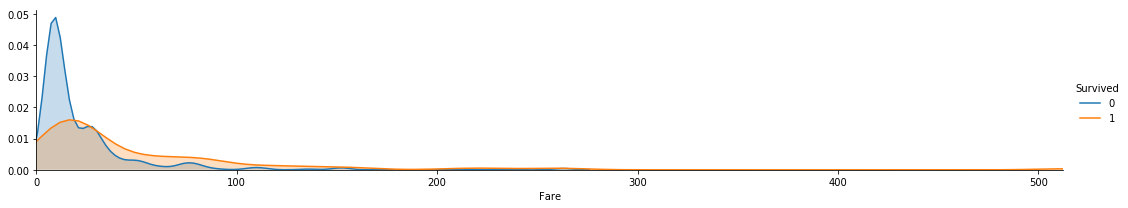

In [47]:
# peaks of survivors by price paid
facet = sns.FacetGrid(df, hue="Survived",aspect=5)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()